In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
daterange = pd.date_range(start='04/1/2020', end='4/30/2020')
daterange


DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', freq='D')

In [86]:
df = pd.DataFrame([])


for date in daterange:
    d = date.strftime('%m-%d-%Y')
    dl = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{d}.csv'
    print(d)
    try:
        df_temp = pd.read_csv(dl)
        df_temp['date'] = d
    except:
        print('oops')
    df = df.append(df_temp)

04-01-2020
04-02-2020
04-03-2020
04-04-2020
04-05-2020
04-06-2020
04-07-2020
04-08-2020
04-09-2020
04-10-2020
04-11-2020
04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020
04-22-2020
04-23-2020
04-24-2020
04-25-2020
04-26-2020
04-27-2020
04-28-2020
04-29-2020
04-30-2020


In [87]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,date
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US",04-01-2020
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US",04-01-2020
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US",04-01-2020
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US",04-01-2020
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US",04-01-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,NaN,NaN,Unknown,China,2020-05-01 02:32:28,NaN,NaN,0,0,0,0,"Unknown, China",04-30-2020
3180,NaN,NaN,NaN,Kiribati,2020-05-01 02:32:28,-3.370400,-168.734000,0,0,0,0,Kiribati,04-30-2020
3181,NaN,NaN,NaN,Palau,2020-05-01 02:32:28,7.515000,134.582500,0,0,0,0,Palau,04-30-2020
3182,NaN,NaN,Cook Islands,New Zealand,2020-05-01 02:32:28,-21.236700,-159.777700,0,0,0,0,"Cook Islands, New Zealand",04-30-2020


In [88]:
df = df[['Province_State','Country_Region','date','Confirmed','Deaths','Recovered']]

In [89]:
df = df.sort_values(by=['Province_State','Country_Region','date'])

In [90]:
df['Confirmed_Daily'] = df['Confirmed'].diff()
df['Deaths_Daily'] = df['Deaths'].diff()

In [96]:
df[df['Country_Region'] == 'Switzerland']

,Province_State,Country_Region,date,Confirmed,Deaths,Recovered,Confirmed_Daily,Deaths_Daily
2465,NaN,Switzerland,04-01-2020,17768,488,2967,-3324.0,-2098.0
2550,NaN,Switzerland,04-02-2020,18827,536,4013,1059.0,48.0
2605,NaN,Switzerland,04-03-2020,19606,591,4846,779.0,55.0
2659,NaN,Switzerland,04-04-2020,20505,666,6415,899.0,75.0
2743,NaN,Switzerland,04-05-2020,21100,715,6415,595.0,49.0
2788,NaN,Switzerland,04-06-2020,21657,765,8056,557.0,50.0
2837,NaN,Switzerland,04-07-2020,22253,821,8704,596.0,56.0
2863,NaN,Switzerland,04-08-2020,23280,895,9800,1027.0,74.0
2891,NaN,Switzerland,04-09-2020,24051,948,10600,771.0,53.0
2920,NaN,Switzerland,04-10-2020,24551,1002,11100,500.0,54.0


In [101]:
df_swiss = df[df['Country_Region'] == 'Switzerland'].copy()

In [102]:
df_swiss['Confirmed_Daily'] = df_swiss['Confirmed'].diff()

In [127]:
df_swiss

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Confirmed_Daily,Deaths_Daily,Confirmed_Daily_Rolling
date,,,,,,,,
04-01-2020,NaN,Switzerland,17768,488,2967,NaN,-2098.0,NaN
04-02-2020,NaN,Switzerland,18827,536,4013,1059.0,48.0,NaN
04-03-2020,NaN,Switzerland,19606,591,4846,779.0,55.0,NaN
04-04-2020,NaN,Switzerland,20505,666,6415,899.0,75.0,NaN
04-05-2020,NaN,Switzerland,21100,715,6415,595.0,49.0,NaN
04-06-2020,NaN,Switzerland,21657,765,8056,557.0,50.0,777.8
04-07-2020,NaN,Switzerland,22253,821,8704,596.0,56.0,685.2
04-08-2020,NaN,Switzerland,23280,895,9800,1027.0,74.0,734.8
04-09-2020,NaN,Switzerland,24051,948,10600,771.0,53.0,709.2


In [115]:
df_swiss = df_swiss.set_index('date')

In [130]:
df_swiss['Confirmed_Daily_Rolling'] = df_swiss.Confirmed_Daily.rolling(7).mean()

Text(0, 0.5, 'Daily Cases')

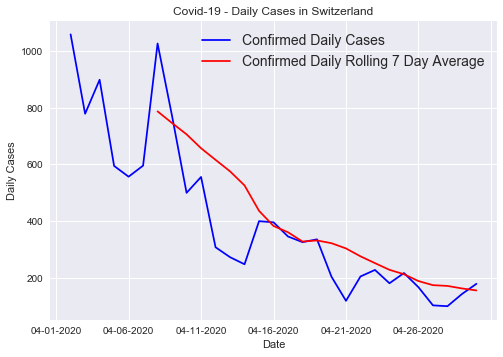

In [131]:
plt.style.use('seaborn')

colors = ['blue', 'red']

df_swiss[['Confirmed_Daily','Confirmed_Daily_Rolling']].plot(color=colors)

plt.legend(labels =['Confirmed Daily Cases', 'Confirmed Daily Rolling 7 Day Average'], fontsize=14)
plt.title('Covid-19 - Daily Cases in Switzerland')
plt.xlabel('Date')
plt.ylabel('Daily Cases')